In [1]:
import pandas as pd
import numpy as np
housing=pd.read_csv("book.csv")



In [2]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]


# # Correlation

In [4]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

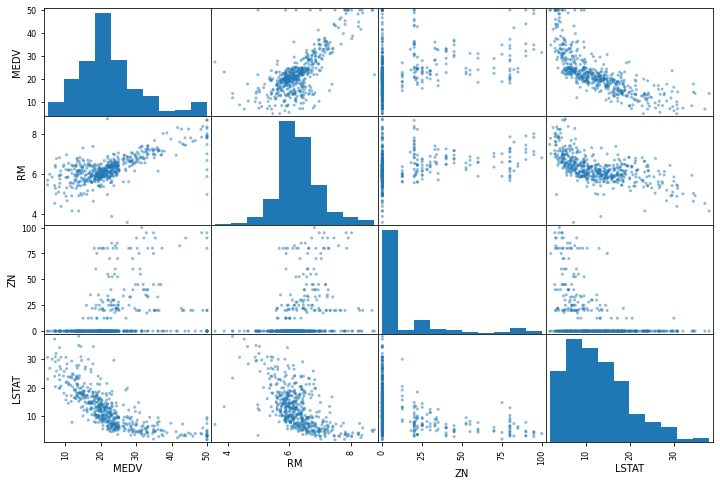

In [5]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

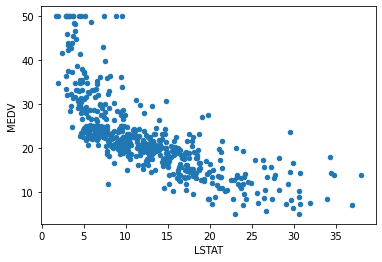

In [6]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV")


In [7]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]
housing["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [8]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

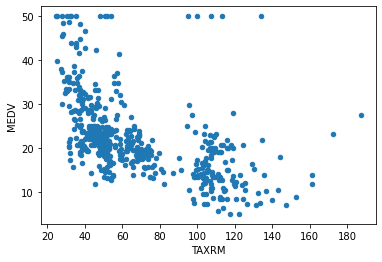

In [9]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV")

# Segregating the features and labels

In [10]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Creating a pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('stdscaler',StandardScaler())])

In [29]:
housing_num=my_pipeline.fit_transform(housing)
housing_num[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Designing the model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num,housing_labels)


RandomForestRegressor()

In [14]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.fit_transform(some_data)
model.predict(prepared_data)


array([19.802, 32.451,  9.563, 21.538, 21.03 ])

In [15]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [16]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num)
mse=mean_squared_error(housing_predictions,housing_labels)
rmse=np.sqrt(mse)

In [17]:
mse

1.449478165841581

# Using evaluation technique

In [18]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse=np.sqrt(-scores)

In [19]:
rmse

array([2.83566369, 2.76242474, 4.58937756, 2.58506935, 3.54307367,
       2.66950413, 4.38993258, 3.25431914, 3.18085515, 3.36958982])

In [20]:
def printinfo(scores):
    print("Scores are:",scores)
    print("Mean is :",scores.mean())
    print("Standard deviation is:",scores.std())
    


In [21]:
printinfo(rmse)

Scores are: [2.83566369 2.76242474 4.58937756 2.58506935 3.54307367 2.66950413
 4.38993258 3.25431914 3.18085515 3.36958982]
Mean is : 3.3179809832333342
Standard deviation is: 0.6588376430980034


# Saving the model

In [22]:
from joblib import dump,load
dump(model,'RealEstate.joblib')

['RealEstate.joblib']

In [26]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.fit_transform(X_test)
Y_predictions=model.predict(X_test_prepared)
mse=mean_squared_error(Y_predictions,Y_test)
rmse=np.sqrt(mse)

In [27]:
rmse

3.377287386088916